# What happened earlier ...
1. The features and the label were selected
1. The features were scaled (by standardizing them to a mean of 0 and std. deviation of 1)
1. Some of the data was used to test the selected classification model (linear regression)
1. After the training was done, the model was tested by applying it on the rest of the data
1. The predicted values were saved into the dataframe and visualized
1. Serialization: saving the classifier once it is trained to reload it when necessary without the need of retraining

## New
### Linear Regression: Fitting a line to data - best fit line
1. Determine the slope and the y-intercept of the line of best fit
1. Calculate the accuracy of the line of best fit by using the coefficient of determination ($r^2$)

Let's define what we need:
$$
m = \frac{\overline{x} \cdot \overline{y} - \overline{xy}}
{(\overline{x})^2 - \overline{x^2}}
$$

$$
b = \overline{y} - m \overline{x}
$$

$$
r^2 = 1 - \frac{SE \hat{y}}{SE \overline{y}}
$$

$$
SE \hat{y} = \sum{ (y_{data} - y_{line})^2 }
$$

$$
SE \overline{y} = \sum{ (y_{data} - \overline{y}_{line})^2 }
$$

Where:
- $m$ represents the slope of the best fit line.
- $\overline{x}$ represents the mean x values of the data.
- $\overline{y}$ represents the mean y values of the data.
- $b$ represents the y-intercept of the best fit line.
- $r^2$ is the coefficient of determination.
- $SE$ denotes the squared error i.e. the squared deviation of 2 y values.
- $SE\hat{y}$ corresponds to the squared error of the y values of the regression line and the original data.
- $SE\overline{y}$ corresponds to the squared error of the line with the mean y value and the original data.

Slope (m): 0.43
Y-intercept (b): 4.00
Coefficient of Determination (r^2): 0.5844


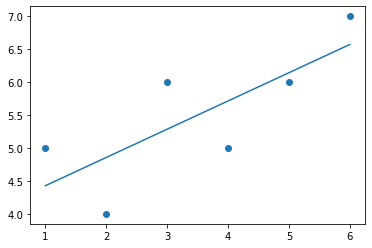

In [32]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    numerator = mean(xs) * mean(ys) - mean(xs*ys)
    denominator = mean(xs)**2 - mean(xs**2)
    m = numerator / denominator
    b = mean(ys) - m*mean(xs)
    return m, b

# calculate the squared error of the line and the original data
def squared_error(ys_orig, ys_line):
    squared_error = sum((ys_line-ys_orig)**2)
    return squared_error

# calculate the COD to determine the accuracy of the line of best fit
def coefficient_of_determination(ys_orig, ys_line):
    # create a list with the mean y value of the origianl data (outcome: horizontal line)
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    
    # calculates the squared error of the regression line
    squared_error_regr = squared_error(ys_orig, ys_line)
    
    # calculates the squared error of the mean y value line
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    # calculate the COD
    r_squared = 1 - (squared_error_regr / squared_error_y_mean)
    
    return r_squared

m, b = best_fit_slope_and_intercept(xs,ys)

# creates a list with the y values of the regression line
regression_line = [ m*x + b for x in xs ]

r_squared = coefficient_of_determination(ys, regression_line)

print("Slope (m): %.2f" % m)
print("Y-intercept (b): %.2f" % b)
print("Coefficient of Determination (r^2): %.4f" % r_squared)

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()
